
 Dataset with Missing Values:
     x      y
0    1   10.0
1    2   20.0
2    3   30.0
3    4   40.0
4    5   50.0
5    6    NaN
6    7   70.0
7    8   80.0
8    9   90.0
9   10  100.0
10  11  110.0
11  12  120.0
12  13  130.0
13  14  140.0
14  15  150.0
15  16    NaN
16  17  170.0
17  18  180.0
18  19  190.0
19  20  200.0


c:\Users\USER 24\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\USER 24\AppData\Local\Temp\ipykernel_5368\4294939553.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"\n Predicted output for input {user_input}: {float(user_pred):.2f}")



 Predicted output for input 1: 45.51


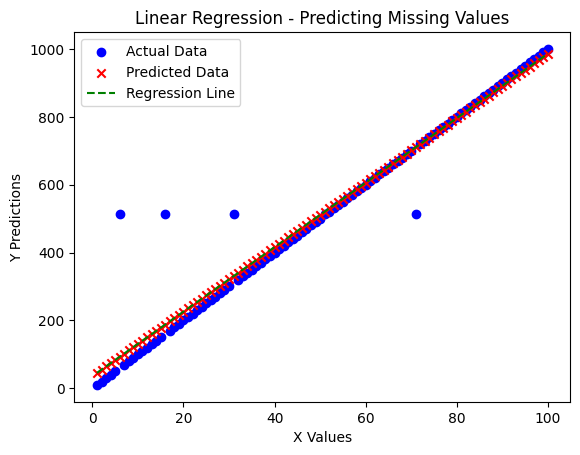


 Model Formula: y = 9.50 * x + 36.01


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Step 1: Create a dataset manually
data = {
    'x': list(range(1, 101)),  # 100 values from 1 to 100
    'y': [10 * i for i in range(1, 101)]  # y = 10 * x
}

df = pd.DataFrame(data)

# Introduce missing values in 'y'
df.loc[5, 'y'] = None
df.loc[15, 'y'] = None
df.loc[30, 'y'] = None
df.loc[50, 'y'] = None
df.loc[70, 'y'] = None

print("\n Dataset with Missing Values:")
print(df.head(20))  # Show first 20 rows

# Step 2: Define Features (X) and Target (y)
X = df[['x']]  # Features
y = df[['y']]  # Target

# Step 3: Handle Missing Values using Mean Imputation
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y)  # Fill missing values

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict Missing Values
df['y_pred'] = model.predict(X)  # Predict for all X

# Step 7: Ask User for Input and Predict
# Ask User for Input and Predict
user_input = int(input("\nEnter a number to predict its output: "))
user_pred = model.predict([[user_input]])[0]  # Extract the single value

# ✅ Convert to float to avoid TypeError
print(f"\n Predicted output for input {user_input}: {float(user_pred):.2f}")


# Step 8: Plot Actual vs. Predicted
plt.scatter(df['x'], y_imputed, color='blue', label="Actual Data")
plt.scatter(df['x'], df['y_pred'], color='red', label="Predicted Data", marker='x')
plt.plot(df['x'], model.predict(X), color='green', linestyle='dashed', label="Regression Line")
plt.xlabel("X Values")
plt.ylabel("Y Predictions")
plt.title("Linear Regression - Predicting Missing Values")
plt.legend()
plt.show()

# Step 9: Show the Model Formula
print("\n Model Formula: y = {:.2f} * x + {:.2f}".format(model.coef_[0][0], model.intercept_[0]))
